### coding on Algebra and statistics

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random
import math

#####  DISTRIBUTIONS

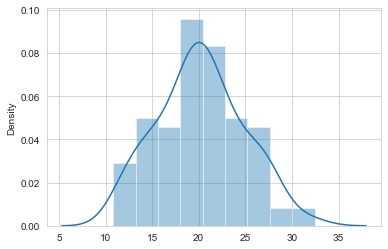

In [15]:

x = np.random.normal(loc = 20, scale = 5, size=100)
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

In [16]:
## Shows Gaussian Distribution plot.(or Normal distribution) with mean 20 and standard deviation 5

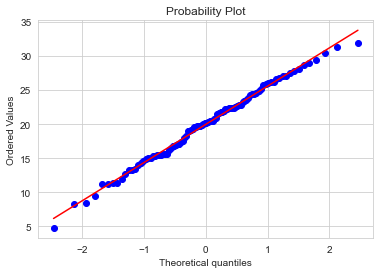

In [19]:
# Q-Q plot to check whether two distributions are same/not

x = np.random.normal(loc = 20, scale = 5, size=100)
sns.set_style("whitegrid")
stats.probplot(x, dist="norm", plot=plt)
plt.show()

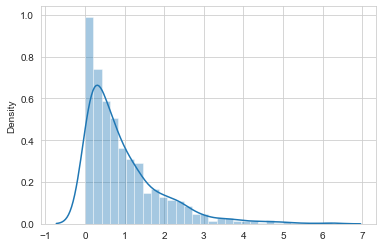

In [28]:
y=np.random.exponential(1,size=1000)
sns.distplot(y)
plt.show()

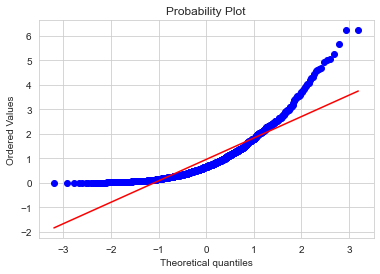

In [29]:
sns.set_style("whitegrid")
stats.probplot(y, dist="norm", plot=plt)
plt.show()

In [22]:
# This shows both the variables are not same...

0.26903231505523734


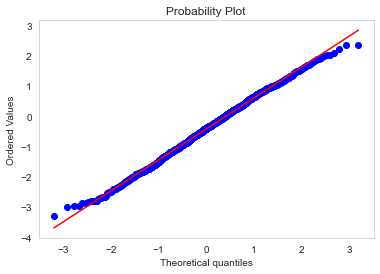

In [30]:
#we can convert most of non-gaussian distribution to gaussian distributions using BOX-COX Transform
y_t, l = stats.boxcox(y) # l=lambda, y_t =y tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(y_t, dist="norm", plot=plt)
plt.grid()

##### BOOTSTRAPPING FOR Confidence Intervals

m--original size of x 10


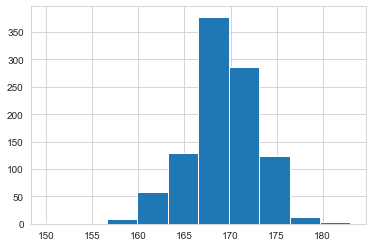

CI of mediana-95% 161.5 176.0


In [34]:
x=np.array([180,162,158,172,168,150,171,183,165,176])   #let's say height of 10 random people
print('m--original size of x',x.size)

n_iterations=1000     #k-number of bootstap samples taken
n_size=int(len(x))    #mn a sample size from the original data
median=[]

for i in range(n_iterations):
    s=random.choices(x,k=n_size)     #picked a sample using random module
    m=np.median(s)                   # calculated the medians
    median.append(m)                # added it to a list
plt.hist(median)
plt.show()

alpha=0.95
p=((1-alpha)/2)*100                
lower=np.percentile(median,p)
k=(alpha+ ((1-alpha)/2))*100      
upper=np.percentile(median,k)

print('CI of mediana-95%',lower,round(upper,0))

##### Finding Angle between two vectors

In [42]:
np.random.seed(100)    #random seed helps us to maintain the constand random numbers 

v1 = np.random.rand(6) 
v2 = np.random.rand(6)      

angle_12 = math.acos(np.dot(v1,v2)/(np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2)))  #acos=cos inverse
print("In Radians- ",round(angle_12,2))
print("In Degree- ",round(((angle_12*180)/math.pi),2))

In Radians-  0.83
In Degree-  47.36


##### Permutaion and Resampling

0.06624816891345076


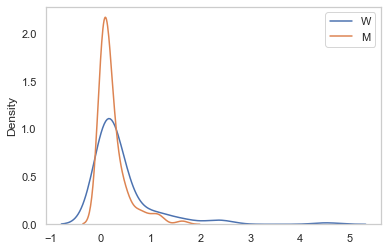

In [44]:
n=100; # sample size

np.random.seed(100)
#observed samples
PM = np.random.pareto(a=5.0,size=n) #purchases made by men
PW = np.random.pareto(a=4.0,size=n)  #purchases made by female

obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))  #test statistic
print(obs)

sns.set(style='whitegrid')
sns.distplot(PW,label="W",hist=False)
sns.distplot(PM, label="M",hist=False)
plt.grid()
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

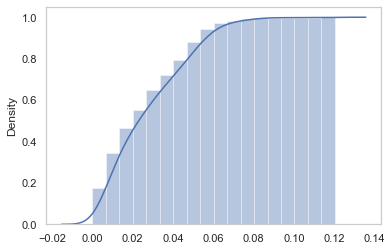

In [46]:
P = np.concatenate((PM,PW)) 

k=1000 
testStats = np.zeros(k)  

for i in range(k):
    np.random.shuffle(P)   
    tmp_men, tmp_women = P[:n], P[n:]   
  
    testStats[i] = abs(np.percentile(tmp_women,50) - np.percentile(tmp_men,50))  

#CDF of testStats
kwargs = {'cumulative': True}
sns.distplot(testStats, hist_kws=kwargs, kde_kws=kwargs, )
plt.grid()
plt.show


In [48]:
# Hypothesis testing: P(testStat > Obs | H0 ) can be estimated from testStats.
obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))
print(obs)

num_h0 = np.sum(testStats >=  obs)  
prob = num_h0/k          #gives the probability            
print(prob)

0.06624816891345076
0.032


- o/p:- less than significant 5%...so null hypothesis is rejected and alternate hypothesis is accepted.
- so there is difference with purchases made by male and women.